# 深度学习与卷积网络

## 数据集：mnist
MNIST数据集是机器学习领域中非常经典的一个数据集，由60000个训练样本和10000个测试样本组成，每个样本都是一张28 * 28像素的灰度手写数字图片。

灰度图：Gray Scale Image 或是Grey Scale Image，又称灰阶图。把白色与黑色之间按对数关系分为若干等级，称为灰度。灰度分为256阶。

任何颜色都有红、绿、蓝三原色组成，而灰度图只有一个通道，他有256个灰度等级，255代表全白，0表示全黑。

## 0. 导入工具库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD

%matplotlib inline

## 1. 加载数据

In [2]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('训练集的shape为：', X_train.shape)
print('训练集的元素个数X_train.shape[0]为：', X_train.shape[0])

训练集的shape为： (60000, 28, 28)
训练集的元素个数X_train.shape[0]为： 60000


In [4]:
print('训练集的第一个元素为：\n', X_train[0])

训练集的第一个元素为：
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

### 对数据进行处理

In [5]:
# 设置图像的行列大小
img_rows, img_cols = 28, 28

# reshape为60000个（X_train.shape[0]）28*28的矩阵
# 并添加最后一位1表示一维空间（彩色是在处理的时候是三维空间RGB，用3表示）
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# 改变数据精度（提高计算效率）
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

## 把数字转成one-hot的形式
# 设置标签类别总数，大于max(y)（标签从0开始的）
num_category = 10

y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

### 拆分训练数据集，构建对训练过程进行监控的验证集

In [6]:
from sklearn.model_selection import train_test_split

# 对训练集进行再拆分，拆分出验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

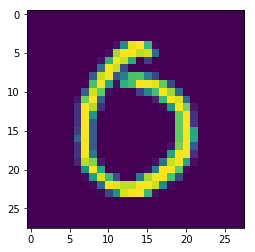

In [7]:
# 展示第一个的图像
plt.imshow(X_train[0].reshape(28, 28))

# 由于在拆分数据集时会打乱顺序，所以输出的不是原始位置的数字

## 2. 数据增强
为了提高模型的泛化能力，我们使用到了一个叫做`数据增强`的处理，在keras中可以通过ImageDataGenerator完成，详细的可以参见[Image Data Generator](http://keras.io/preprocessing/image/)。这个处理会对输入的图片数据进行例如旋转、平移、截取、水平、垂直翻转等处理，并不改变图像内容，但是能扩量计算机没有看过的数据，提高模型的泛化能力。

#### Tip: 这部分计算量会比较大，未纳入本次实验

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generated_images = ImageDataGenerator(featurewise_center=True, # set input mean to 0 over the dataset
                                      samplewise_center=False,
                                      featurewise_std_normalization=True,
                                      samplewise_std_normalization=False,
                                      zca_whitening=False,
                                      rotation_range=0,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=False
                                     )

generated_images.fit(X_train)

## 3. 构建模型

In [8]:
nb_epoch = 10 # 迭代轮次
batch_size = 128 # 一个batch的数据量
nb_filters = 32 # 卷积层filter的个数
nb_pool = 2 # 池化层的kernal size
nb_conv = 3

In [10]:
# 构建模型
model = Sequential()

# 加入卷积层
model.add(Conv2D(nb_filters, 
                 (nb_conv, nb_conv), 
                 padding='same', 
                 input_shape=(28, 28, 1),
                 activation='relu'
                )
         )
# 加入最大池化层
model.add(MaxPool2D(2, 2))

# 加入卷积层
model.add(Conv2D(nb_filters, 
                 (nb_conv, nb_conv), 
                 activation='relu'
                )
         )
# 加入最大池化层
model.add(MaxPool2D(2, 2))

# 加入卷积层
model.add(Conv2D(nb_filters, 
                 (nb_conv, nb_conv), 
                 activation='relu'
                )
         )
# 加入最大池化层
model.add(MaxPool2D(2, 2))

# 将二维输出转换为一维
model.add(Flatten())

# 添加全连接层
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)              

## 4. 模型训练与评估

In [12]:
print('测试集标签的shape为：', y_test.shape)

测试集标签的shape为： (10000, 10)


In [13]:
model.fit(X_train, 
          y_train,
          epochs = nb_epoch,
          batch_size = batch_size,
          verbose = 1, # 展示训练过程
          validation_data = (X_val, y_val) # 验证集数据
         )

Epoch 1/10
352/352 [==============================] - 32s 90ms/step - loss: 0.5150 - accuracy: 0.8341 - val_loss: 0.1125 - val_accuracy: 0.9645
Epoch 2/10
352/352 [==============================] - 32s 92ms/step - loss: 0.1425 - accuracy: 0.9575 - val_loss: 0.0841 - val_accuracy: 0.9739
Epoch 3/10
352/352 [==============================] - 32s 91ms/step - loss: 0.1003 - accuracy: 0.9701 - val_loss: 0.0637 - val_accuracy: 0.9787
Epoch 4/10
352/352 [==============================] - 32s 90ms/step - loss: 0.0802 - accuracy: 0.9758 - val_loss: 0.0588 - val_accuracy: 0.9819
Epoch 5/10
352/352 [==============================] - 32s 92ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 0.0523 - val_accuracy: 0.9843
Epoch 6/10
352/352 [==============================] - 32s 90ms/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 0.0591 - val_accuracy: 0.9812
Epoch 7/10
352/352 [==============================] - 31s 89ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0434 - val_accuracy:

In [14]:
# 训练集评估
model.evaluate(X_train, y_train)

1407/1407 [==============================] - 8s 6ms/step - loss: 0.0184 - accuracy: 0.9940


[0.018396474421024323, 0.9940444231033325]

In [15]:
# 测试评估
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0312 - accuracy: 0.9902


[0.03122025728225708, 0.9901999831199646]

### 扩展研究
学有余力的同学可以尝试采用keras自带的cifar10数据集进一步开展实验。了解图像的RGB表达模式（对比本实验中的灰度图模式）。

CIFAR-10 是一个包含60000张图片的数据集。其中每张照片为32*32的彩色照片，每个像素点包括RGB三个数值，数值范围 0 ~ 255。所有照片分属10个不同的类别，分别是 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。其中五万张图片被划分为训练集，剩下的一万张图片属于测试集。